# Initial Data Exploration

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb

In [5]:
# data frame 1
df_1 = pd.read_csv('data/posts.csv')

df_1.head(5)

# axis - A DataFrame object has two axes: 
# “axis 0” and “axis 1”. “axis 0” represents rows and “axis 1” represents columns. 
#Now it's clear that Series and DataFrame share the same direction for “axis 0” –
#it goes along rows direction.

,Unnamed: 0,title,score,id,subreddit,url,num_comments,body,created
0,0,So real talk. Why are so may $30k to $40k per ...,12257,9u3fww,jobs,https://www.reddit.com/r/jobs/comments/9u3fww/...,3980,It just seems odd that when I go on job boards...,1.541368e+09
1,1,I'm an ex-recruiter for some of the top compan...,7261,7y8k6p,jobs,https://www.reddit.com/r/jobs/comments/7y8k6p/...,689,"**April 5, 2020 edit:** I've been getting more...",1.518923e+09
2,2,A Warning About Glassdoor,5477,jbod57,jobs,https://www.reddit.com/r/jobs/comments/jbod57/...,470,**EDIT**: A little info from Glassdoor that I ...,1.602800e+09
3,3,"America is not lacking in skilled employees, A...",3727,jo6lc7,jobs,https://www.reddit.com/r/jobs/comments/jo6lc7/...,354,If every entry level job requires a year exper...,1.604558e+09
4,4,UPDATE 3: I have slipped through the cracks at...,3569,3jjs1n,jobs,https://www.reddit.com/r/jobs/comments/3jjs1n/...,1264,Link to my original post: https://www.reddit.c...,1.441350e+09


In [7]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1000 non-null   int64  
 1   title         1000 non-null   object 
 2   score         1000 non-null   int64  
 3   id            1000 non-null   object 
 4   subreddit     1000 non-null   object 
 5   url           1000 non-null   object 
 6   num_comments  1000 non-null   int64  
 7   body          935 non-null    object 
 8   created       1000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


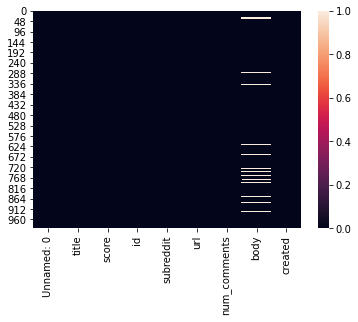

In [9]:
# see the missing values using seaborn
sb.heatmap(df_1.isnull())

### How to Handle Missing Values
for missing values - usually you interpolate (finding the missing value using midpoint of values surrounding it), but what about something like post.body?

to interpolate, do `df['name of column to format'] = df['name of column to format'].interpolate()`

one option is to drop that observation with `df = df.dropna()`. 


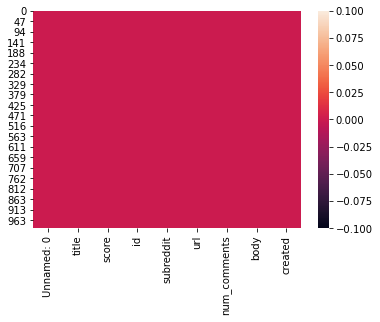

In [11]:
df_1 = df_1.dropna()
sb.heatmap(df_1.isnull())

In [15]:
df_1.head(6)

,Unnamed: 0,title,score,id,subreddit,url,num_comments,body,created
0,0,So real talk. Why are so may $30k to $40k per ...,12257,9u3fww,jobs,https://www.reddit.com/r/jobs/comments/9u3fww/...,3980,It just seems odd that when I go on job boards...,1.541368e+09
1,1,I'm an ex-recruiter for some of the top compan...,7261,7y8k6p,jobs,https://www.reddit.com/r/jobs/comments/7y8k6p/...,689,"**April 5, 2020 edit:** I've been getting more...",1.518923e+09
2,2,A Warning About Glassdoor,5477,jbod57,jobs,https://www.reddit.com/r/jobs/comments/jbod57/...,470,**EDIT**: A little info from Glassdoor that I ...,1.602800e+09
3,3,"America is not lacking in skilled employees, A...",3727,jo6lc7,jobs,https://www.reddit.com/r/jobs/comments/jo6lc7/...,354,If every entry level job requires a year exper...,1.604558e+09
4,4,UPDATE 3: I have slipped through the cracks at...,3569,3jjs1n,jobs,https://www.reddit.com/r/jobs/comments/3jjs1n/...,1264,Link to my original post: https://www.reddit.c...,1.441350e+09
5,5,LinkedIn has turned into a glorified Facebook,3216,i08bm3,jobs,https://www.reddit.com/r/jobs/comments/i08bm3/...,448,"I'm logging into LinkedIn now more and more, a...",1.596084e+09


### Convert Categorical Values to Numeric

checking which columns contain non numeric values with `df.info()`, do:

step 1: make dummy variables from the categorical columns
step 2: 